In [1]:
from konlpy.tag import Okt

In [2]:
t = Okt()

In [3]:
tokens_ko = t.nouns("나는 가방에 들어갈거야..가방..가방...진짜야..진짜..진짜..진짜..진짜..오늘은 수요일이야..오늘")

In [4]:
tokens_ko

['나', '가방', '가방', '가방', '진짜', '진짜', '진짜', '진짜', '진짜', '오늘', '수요일', '오늘']

In [5]:
import nltk #자연어 처리에 대한 객체를 만듬

In [6]:
ko = nltk.Text(tokens_ko, name='test') #test란 이름의 말뭉치 생성

In [7]:
#####한글처리######
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
 
%config InlineBackend.figure_format = 'retina'

In [15]:
import matplotlib.font_manager as fm
fontpath = 'C:/ProgramData/Anaconda3/Lib/site-packages/pytagcloud/fonts/Cuprum.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name)

In [16]:
fm._rebuild()
######한글처리 끝 ######

In [25]:
#2-6-2. matplotlib의 한글 폰트 처리
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

#f_path = "/Library/Fonts/AppleGothic.ttf"
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

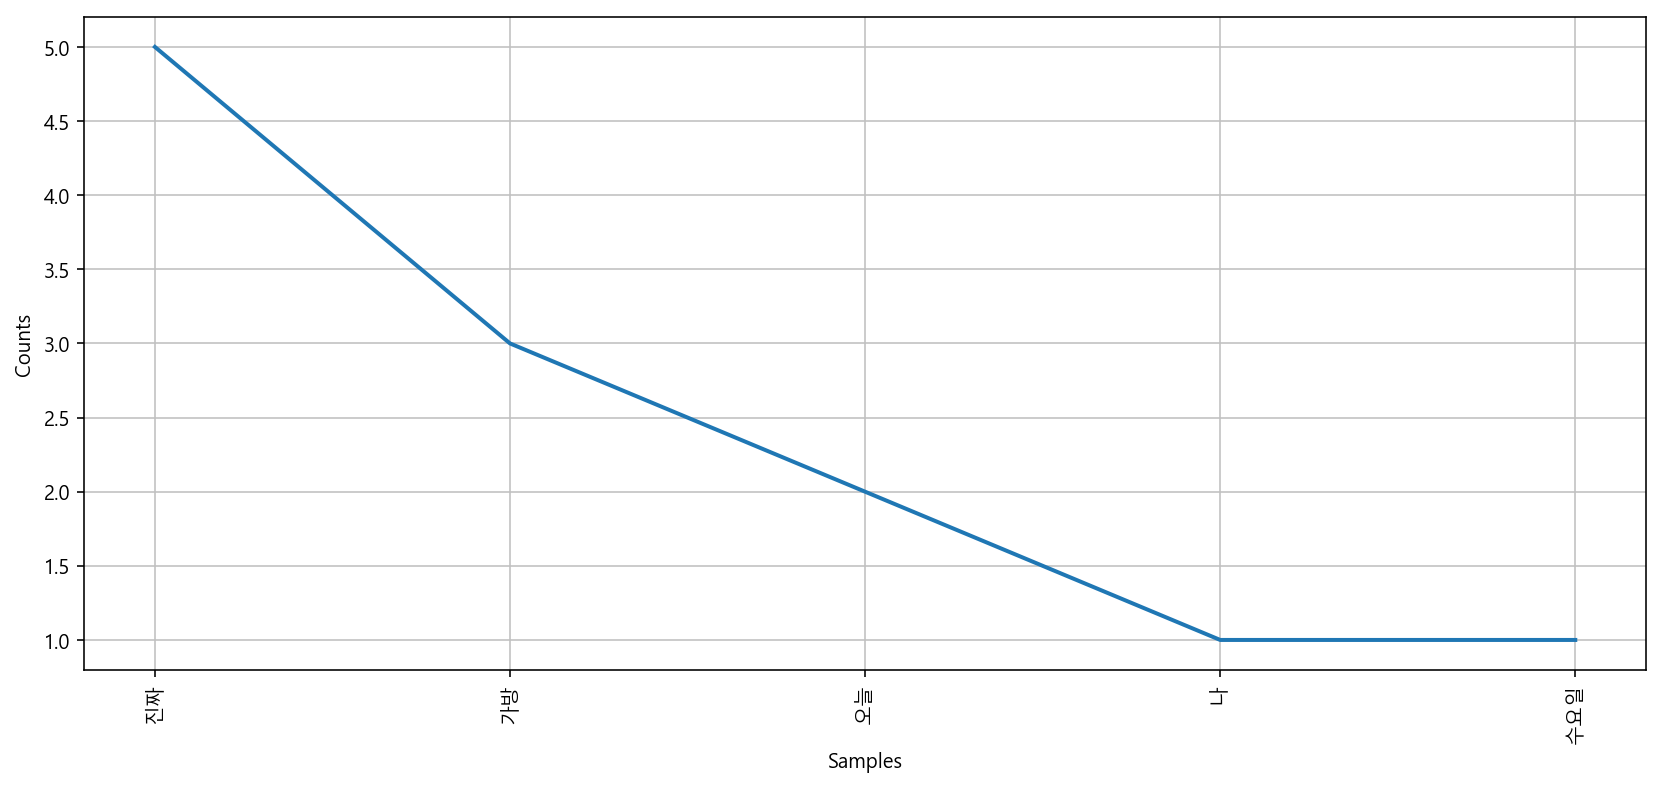

In [26]:
plt.figure(figsize=(14,6))
ko.plot(50)
plt.show()

In [31]:
musk = """머스크 CEO는 12일(현지 시각) 트위터를 통해 “테슬라는 비트코인으로 차량을 구매하는 것을 보류하기로 했다”며 “우리는 비트코인 채굴과 거래에 들어가는 화석연료 사용 급증에 대해 우려하고 있다”며 이같이 밝혔다.

머스크는 “가상 자산은 여러 차원에서 좋은 아이디어이며, 미래에도 전도유망할 것이라고 믿지만, 환경에 큰 비용을 들일 수는 없다”고 했다.

이어 “보유 중인 비트 코인을 팔지는 않을 것이며, 보다 지속 가능한 에너지로 채굴이 가능해지면 즉시 거래에 사용할 것”이라며 “거래당 소모 에너지가 비트코인의 1%보다도 적은 다른 가상 자산도 살펴보고 있다”고 했다.

이 같은 머스크의 트윗 내용이 알려진 뒤 비트코인 시세는 급락하고 있다. 13일 오전 8시(한국 시각) 기준으로 빗썸에서 거래되는 비트코인은 1시간 전보다 5.45% 포인트 떨어진 6480만원 선에서 거래되고 있다."""

In [32]:
tokens_musk = t.nouns(musk)
tokens_musk

['머스크',
 '현지',
 '시각',
 '트위터',
 '통해',
 '테슬라',
 '비트코인',
 '차량',
 '구매',
 '것',
 '보류',
 '며',
 '우리',
 '비트코인',
 '채굴',
 '거래',
 '화석연료',
 '사용',
 '급증',
 '대해',
 '우려',
 '며',
 '머스크',
 '가상',
 '자산',
 '여러',
 '차원',
 '아이디어',
 '미래',
 '전도',
 '유망',
 '것',
 '환경',
 '비용',
 '수',
 '고',
 '보유',
 '중인',
 '비트',
 '코인',
 '팔지',
 '것',
 '지속',
 '에너지',
 '채굴',
 '즉시',
 '거래',
 '사용',
 '것',
 '라며',
 '거래',
 '소모',
 '에너지',
 '비트코인',
 '다른',
 '가상',
 '자산',
 '고',
 '이',
 '머스크',
 '트윗',
 '내용',
 '뒤',
 '비트코인',
 '시세',
 '급락',
 '오전',
 '한국',
 '시각',
 '기준',
 '빗썸',
 '거래',
 '비트코인',
 '전보',
 '포인트',
 '선',
 '거래']

In [33]:
musk_ko = nltk.Text(tokens_musk, name="musk")

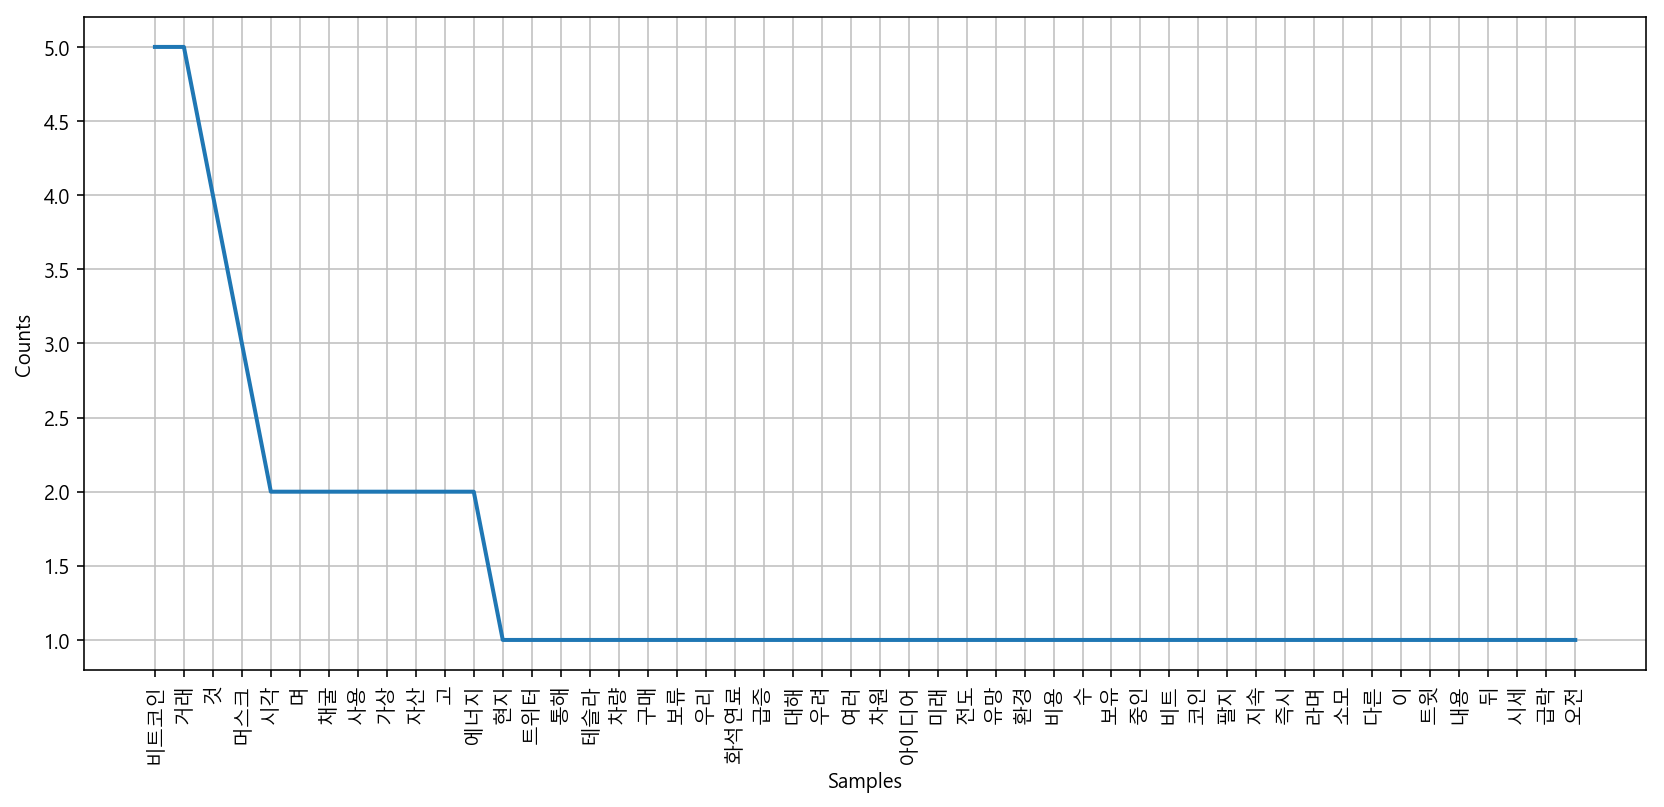

In [34]:
plt.figure(figsize=(14,6))
musk_ko.plot(50)
plt.show()

In [35]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [36]:
import requests
from bs4 import BeautifulSoup
import re

# 크롤링할 사이트 주소를 정의합니다.
source_url = "https://namu.wiki/RecentChanges"

# 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

In [39]:
# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)

# 중복 url을 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%EC%96%B4%EB%8A%90%20%EB%82%A0%20%EC%9A%B0%EB%A6%AC%20%EC%A7%91%20%ED%98%84%EA%B4%80%EC%9C%BC%EB%A1%9C%20%EB%A9%B8%EB%A7%9D%EC%9D%B4%20%EB%93%A4%EC%96%B4%EC%99%94%EB%8B%A4
https://namu.wiki/w/%EB%AF%B8%EC%9D%B8%20%EA%B7%B8%EB%A0%A4%EB%86%93%EA%B3%A0%20%ED%8F%89%EB%B2%94%ED%95%98%EB%8B%A4%EA%B3%A0%20%EC%9A%B0%EA%B8%B0%EA%B8%B0
https://namu.wiki/w/%ED%83%80%EC%9D%B4%ED%83%84(%EB%8B%A4%ED%81%AC%20%EC%8A%A4%ED%86%A0%EB%A6%AC%20%EC%8B%9C%EB%A6%AC%EC%A6%88)
https://namu.wiki/w/%EC%82%AC%EC%9A%B0%EC%8A%A4%20%ED%8C%8C%ED%81%AC
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:MG%20%EA%B1%B4%EB%8B%B4%20%EB%B2%84%EC%B2%B4%20CG.jpg


In [40]:
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

어느 날 우리 집 현관으로 멸망이 들어왔다 


어느 날 우리 집 현관으로 멸망이 들어왔다


 대한민국의  주요 방송사 드라마 편성표 [ 펼치기 · 접기 ] 월  화  수  목  금  토  일 미스 몬테크리스토 | 19:50오케이 광자매 | 19:55속아도 꿈결 | 20:30오월의 청춘 | 21:30대박부동산 | 21:30이미테이션 | 23:20밥이 되어라19:10오! 주인님21:20 아모르 파티 - 사랑하라, 지금08:35라켓소년단5/31모범택시22:00 종합편성채널로스쿨 | 21:00보쌈-운명을 훔치다 | 21:40언더커버 | 23:00어쩌다 가족 | 12:50어느 날 우리 집 현관으로 멸망이 들어왔다 | 21:00마우스 | 22:30마인 | 21:00다크홀 | 22:50 * 방영 중 | 방영 예정* 틀의 과도한 확장을 방지하고자 자체제작 드라마와 본방송만 기재한다. 월  화  수  목  금  토  일 미스 몬테크리스토 | 19:50오케이 광자매 | 19:55속아도 꿈결 | 20:30오월의 청춘 | 21:30대박부동산 | 21:30이미테이션 | 23:20밥이 되어라19:10오! 주인님21:20 아모르 파티 - 사랑하라, 지금08:35라켓소년단5/31모범택시22:00 종합편성채널로스쿨 | 21:00보쌈-운명을 훔치다 | 21:40언더커버 | 23:00어쩌다 가족 | 12:50어느 날 우리 집 현관으로 멸망이 들어왔다 | 21:00마우스 | 22:30마인 | 21:00다크홀 | 22:50 * 방영 중 | 방영 예정* 틀의 과도한 확장을 방지하고자 자체제작 드라마와 본방송만 기재한다. 월화 드라마나빌레라(2021년 3월 22일 ~ 2021년 4월 27일)▶어느 날 우리 집 현관으로 멸망이 들어왔다  (2021년 5월 10일 ~ 2021년 6월 29일 예정)▶TBD  월화 드라마   (2021)  Doom at Your Service 장르드라마, 로맨스 코미디, 판타지 방송 시간 월 · 화 /  오후 09:00 ~  방송 기간 방송 중 2021년 5월 10일 ~

In [41]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비합니다.
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns=columns)

In [43]:
# 각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만듭니다.
for page_url in page_urls:

    # 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name="article")
    title = contents_table.find_all('h1')[0]
    
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all('ul')) > 0:
        category = contents_table.find_all('ul')[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    content_corpus_list = []
    
    # 페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
        
    # 페이지 내 카테고리정보에서 “분류”라는 단어와 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
    
    # 모든 정보를 하나의 데이터 프레임에 저장합니다.
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)
